## （六）Python 常用的库及综合实战

#### pillow 处理图片

In [13]:
from PIL import Image, ImageFilter

img=Image.open('/Users/admin/test/img.jpg')
w,h=img.size
print('width',w,'height',h)
img.thumbnail((w//2,h//2))
img.save('/Users/admin/test/img_thumbnail.jpg')

img=Image.open('/Users/admin/test/img_thumbnail.jpg')
img2=img.filter(ImageFilter.BLUR)
img2.save('/Users/admin/test/img_blur.jpg','jpeg')

width 256 height 361


### requests处理web请求

In [17]:
import requests
url='http://www.baidu.com'
r=requests.get(url)
print(r.text)
print(r.status_code)
print(r.encoding)
#页面编码与实际编码不符，重新替换编码格式，解决中文乱码问题
text=r.text.encode('ISO-8859-1').decode('utf-8')
print(text)

<!DOCTYPE html>
<!--STATUS OK--><html> <head><meta http-equiv=content-type content=text/html;charset=utf-8><meta http-equiv=X-UA-Compatible content=IE=Edge><meta content=always name=referrer><link rel=stylesheet type=text/css href=http://s1.bdstatic.com/r/www/cache/bdorz/baidu.min.css><title>ç¾åº¦ä¸ä¸ï¼ä½ å°±ç¥é</title></head> <body link=#0000cc> <div id=wrapper> <div id=head> <div class=head_wrapper> <div class=s_form> <div class=s_form_wrapper> <div id=lg> <img hidefocus=true src=//www.baidu.com/img/bd_logo1.png width=270 height=129> </div> <form id=form name=f action=//www.baidu.com/s class=fm> <input type=hidden name=bdorz_come value=1> <input type=hidden name=ie value=utf-8> <input type=hidden name=f value=8> <input type=hidden name=rsv_bp value=1> <input type=hidden name=rsv_idx value=1> <input type=hidden name=tn value=baidu><span class="bg s_ipt_wr"><input id=kw name=wd class=s_ipt value maxlength=255 autocomplete=off autofocus></span><span class="bg s_btn_wr"><input typ

#### 利用requests实现模拟豆瓣登录

In [28]:
from bs4 import BeautifulSoup

user_agent='Mozilla/5.0(Macintosh;IntelMacOSX10_7_0)AppleWebKit/535.11(KHTML,likeGecko)Chrome/17.0.963.56Safari/535.11'
headers={'user-agent':user_agent}
url_login='https://accounts.douban.com/login'

session=requests.Session()
formdata={
    'redir':'https://www.douban.com/',
    'form_email':'1355051656@qq.com',
    'form_password':'XDMBL51378XVcdjz'
}

resp=session.post(url_login,data=formdata,headers=headers)

bs=BeautifulSoup(resp.text,'html5lib')
captcha=bs.select('img#captcha_image')

if captcha:
    captcha=captcha[0]
    #处理验证码
    print(captcha.text)
    img_url=captcha.get('src').strip()
    print(img_url)
    id_=img_url.split('?')[1].split('&')[0].split('=')[1]
    text=input('请输入验证码')
    formdata['captcha-solution']=text
    formdata['captcha-id']=id_
    resp=session.post(url_login,data=formdata,headers=headers)
    
with open('/Users/admin/test/douban.txt','w+',encoding='utf-8') as f:
    f.write(resp.text)



https://www.douban.com/misc/captcha?id=gqWqVlNDY8sLcA5TCVlXIUst:en&size=s
请输入验证码short


#### psutil

In [29]:
import psutil

print(psutil.cpu_count())
print(psutil.cpu_count(logical=False))
print(psutil.cpu_times())
print(psutil.cpu_percent(interval=1, percpu=True))
print(psutil.virtual_memory())
print(psutil.swap_memory())
print(psutil.disk_partitions())
print(psutil.disk_usage('/'))
print(psutil.disk_io_counters())

4
2
scputimes(user=10212.96, nice=0.0, system=4485.58, idle=31801.33)
[65.0, 39.0, 59.0, 38.0]
svmem(total=8589934592, available=2201673728, percent=74.4, used=6644588544, free=78303232, active=2429153280, inactive=2123370496, wired=2092064768)
sswap(total=1073741824, used=34865152, free=1038876672, percent=3.2, sin=4223537152, sout=25833472)
[sdiskpart(device='/dev/disk1', mountpoint='/', fstype='hfs', opts='rw,local,rootfs,dovolfs,journaled,multilabel'), sdiskpart(device='/Applications/GitHub Desktop.app', mountpoint='/private/var/folders/f8/jrgksr0s2kj4t4qnpnv9fb580000gn/T/AppTranslocation/70503368-E2A9-4855-AC1A-84FC703E5138', fstype='nullfs', opts='ro,nosuid,local,dontbrowse,multilabel')]
sdiskusage(total=249678528512, used=160382676992, free=89033707520, percent=64.3)
sdiskio(read_count=344435, write_count=137861, read_bytes=6769195520, write_bytes=3330259456, read_time=111372, write_time=76994)


#### pandas 数据分析与绘图

In [37]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame

%matplotlib inline

# 加载数据
result_df = pd.read_csv('/Users/admin/test/2016-us-ge-by-county.csv')
result_df.drop('StateCode', axis=1, inplace=True)
result_df.drop('CountyFips', axis=1, inplace=True)
result_df.head()

,StateName,CountyName,CountyTotalVote,Party,Candidate,VoteCount
0,alaska,Alaska,246588,GOP,Trump,130415.0
1,alabama,Macon,8748,GOP,Trump,1394.0
2,alabama,Wilcox,6095,GOP,Trump,1737.0
3,alabama,Coosa,5223,GOP,Trump,3376.0
4,alabama,Blount,25384,GOP,Trump,22808.0


#### 合并成一张表且按轴分组

In [46]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame

# 加载数据
result_df = pd.read_csv('/Users/admin/test/2016-us-ge-by-county.csv')
result_df.drop('StateCode', axis=1, inplace=True)
result_df.drop('CountyFips', axis=1, inplace=True)
result_df.head()
# 提取Trump和希拉里数据
trump_df = result_df[result_df['Candidate'] == 'Trump']
clinton_df = result_df[result_df['Candidate'] == 'Clinton']
trump_df.info()
trump_df.head()
#合并成一张表且按轴分组
result_df=pd.merge(trump_df,clinton_df,on=['StateName','CountyName','CountyTotalVote'],suffixes=['_t','_c'])
result_df.drop('Party_t',axis=1,inplace=True)
result_df.drop('Party_c',axis=1,inplace=True)
result_df.drop('Candidate_t',axis=1,inplace=True)
result_df.drop('Candidate_c',axis=1,inplace=True)
result_df.columns=['StateName','CountyName','TotalVote','VoteTrump','VoteClinton']
result_df=result_df.groupby(by=result_df['StateName'],as_index=False).sum() #试下as_index不同值的区别
print(result_df)
result_df.drop([8],inplace=True) #删除district-of-columbia
result_df['T-Ratio']=result_df['VoteTrump']/result_df['TotalVote']
result_df['C-Ratio']=result_df['VoteClinton']/result_df['TotalVote']
result_df['Winner']=list(map(lambda x,y:'Trump' if x>y else 'Clinton',result_df['T-Ratio'],result_df['C-Ratio']))
print(result_df.head())
print(result_df['Winner'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3113 entries, 0 to 3112
Data columns (total 6 columns):
StateName          3113 non-null object
CountyName         3113 non-null object
CountyTotalVote    3113 non-null int64
Party              3113 non-null object
Candidate          3113 non-null object
VoteCount          3113 non-null float64
dtypes: float64(1), int64(1), object(4)
memory usage: 170.2+ KB
               StateName  TotalVote  VoteTrump  VoteClinton
0                alabama    2078165  1306925.0     718084.0
1                 alaska     246588   130415.0      93007.0
2                arizona    1960053   972900.0     888374.0
3               arkansas    1121684   677904.0     378729.0
4             california    8930459  2969532.0    5488261.0
5               colorado    2401267  1075770.0    1126384.0
6            connecticut    1528817   637919.0     823360.0
7               delaware     441535   185103.0     235581.0
8   district-of-columbia     280272    11553.0    

In [49]:
# 加载收入数据，来源：https://en.wikipedia.org/wiki/List_of_U.S._states_by_income
income_df = pd.read_csv('/Users/admin/test/2015-us-income-by-county.csv')
income_df.info()
income_df.head()
# 合并收入数据
result_df = pd.merge(result_df, income_df, on=['StateName'])
result_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
StateName    50 non-null object
Income       50 non-null int64
dtypes: int64(1), object(1)
memory usage: 880.0+ bytes


,StateName,TotalVote,VoteTrump,VoteClinton,T-Ratio,C-Ratio,Winner,Income
0,alabama,2078165,1306925.0,718084.0,0.628884,0.345538,Trump,44765
1,alaska,246588,130415.0,93007.0,0.528878,0.377176,Trump,73355
2,arizona,1960053,972900.0,888374.0,0.496364,0.453240,Trump,51492
3,arkansas,1121684,677904.0,378729.0,0.604363,0.337643,Trump,41995
4,california,8930459,2969532.0,5488261.0,0.332517,0.614555,Clinton,64500


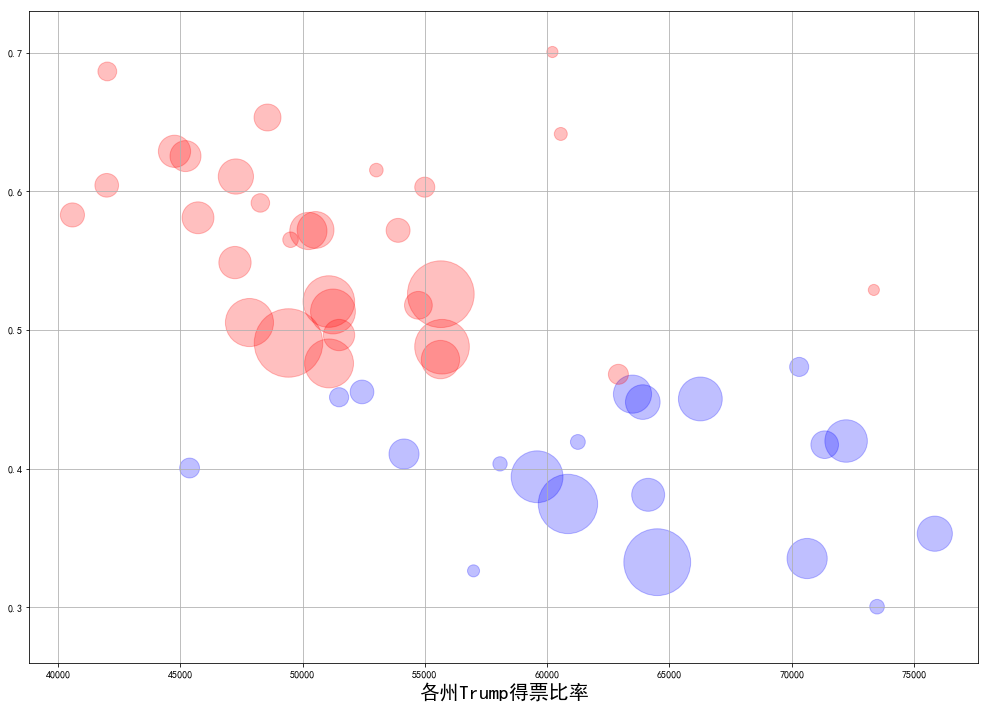

In [53]:
colors=result_df.Winner.map({'Trump':'Red','Clinton':'Blue'}) #根据赢家设置颜色
spot_size=result_df.TotalVote/2000.0 #设置点大小
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.figure(figsize=(17,12))
plt.scatter(x=result_df['Income'],y=result_df['T-Ratio'],s=spot_size,c=colors,alpha=0.25)
plt.xlabel('人均收入（美元）',fontsize=20)
plt.xlabel('各州Trump得票比率',fontsize=20)
plt.grid(True) #添加网格
plt.show()

#### 线形图

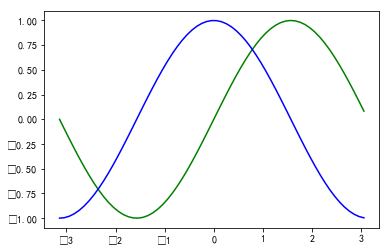

In [56]:
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(-np.pi,np.pi,0.1)
ysin=np.sin(x)
ycos=np.cos(x)
plt.plot(x,ysin,'g')
plt.plot(x,ycos,'b')

#### 柱状图

<BarContainer object of 12 artists>

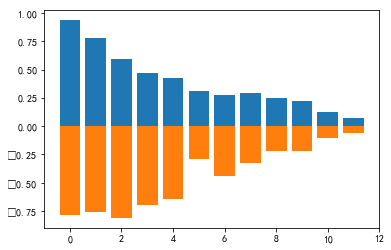

In [57]:
import numpy as np
import matplotlib.pyplot as plt

n=12
x=np.arange(12)
y1=(1-x/float(n))*np.random.uniform(0.5,1,n)
y2=(1-x/float(n))*np.random.uniform(0.5,1,n)
plt.bar(x,y1)
plt.bar(x,-y2)

#### 堆叠柱状图

<BarContainer object of 5 artists>

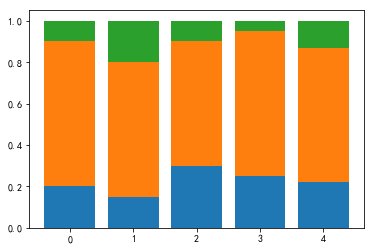

In [60]:
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(5)
s_1=np.array([0.2,0.15,0.3,0.25,0.22])
s_2=np.array([0.7,0.65,0.6,0.7,0.65])
s_3=np.array([0.1,0.2,0.1,0.05,0.13])
plt.bar(x,s_1,label='s_1')
plt.bar(x,s_2,bottom=s_1,label='s_2')
plt.bar(x,s_3,bottom=(s_1+s_2),label='s_3')

#### 并列柱状图

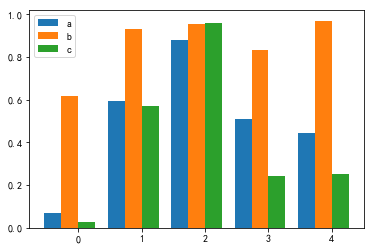

In [65]:
import numpy as np
import matplotlib.pyplot as plt

total_width=0.8 #总宽度0.8
n=3 #3个柱子
width=total_width/n
x=np.arange(5)
x=x-(total_width/2)
a=np.random.random(5)
b=np.random.random(5)
c=np.random.random(5)
plt.bar(x,a,width=width,label='a')
plt.bar(x+width,b,width=width,label='b')
plt.bar(x+width*2,c,width=width,label='c')
plt.legend()

#### 横向柱状图

<BarContainer object of 5 artists>

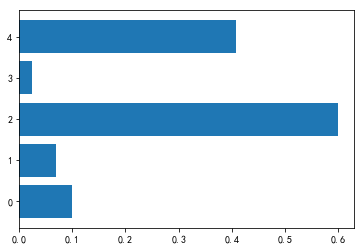

In [66]:
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(5)
a=np.random.random(5)
plt.barh(x,a)

#### 横向并列柱状图

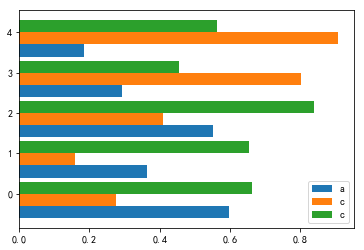

In [67]:
import numpy as np
import matplotlib.pyplot as plt

total_height=0.9 #总宽度0.9
n=3
height=total_height/n
x=np.arange(5)
x=x-(total_height/2)
a=np.random.random(5)
b=np.random.random(5)
c=np.random.random(5)
plt.barh(x,a,height=height,label='a')
plt.barh(x+height,b,height=height,label='c')
plt.barh(x+height*2,c,height=height,label='c')
plt.legend()

#### 直方图

/Users/admin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([0.08333333, 0.16666667, 0.25      , 0.25      , 0.33333333,
        0.41666667, 0.41666667, 0.5       , 0.58333333, 0.75      ,
        0.83333333, 0.91666667, 0.91666667, 0.91666667, 0.91666667,
        0.91666667, 1.        ]),
 array([ 0.        ,  0.94117647,  1.88235294,  2.82352941,  3.76470588,
         4.70588235,  5.64705882,  6.58823529,  7.52941176,  8.47058824,
         9.41176471, 10.35294118, 11.29411765, 12.23529412, 13.17647059,
        14.11764706, 15.05882353, 16.        ]),
 <a list of 17 Patch objects>)

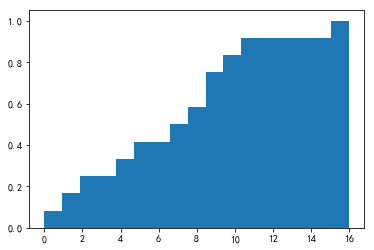

In [68]:
data = [0, 10, 8, 7, 11, 2, 4, 9, 16, 5, 1, 9]
plt.hist(data, bins=(max(data) - min(data)) + 1, normed=True, cumulative=True)

#### 核密度曲线

/Users/admin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


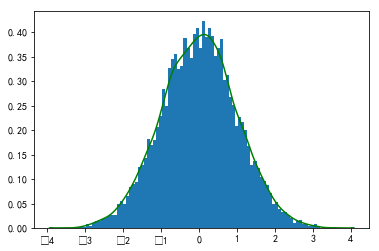

In [69]:
data = np.random.randn(10000)
kde = mlab.GaussianKDE(data)
plt.hist(data, 100, normed=True)
x = np.linspace(data.min(), data.max(), 10000)
plt.plot(x, kde(x), 'g')

#### 散点图

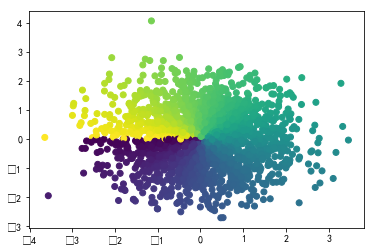

In [72]:
n=2048
x = np.random.randn(n)
y = np.random.randn(n)
t=np.arctan2(y,x)
plt.scatter(x,y,c=t)

#### 极坐标 - 能力图

[0.         1.25663706 2.51327412 3.76991118 5.02654825 0.        ]
['leadership', 'force', 'wisdom', 'politics', 'charm']


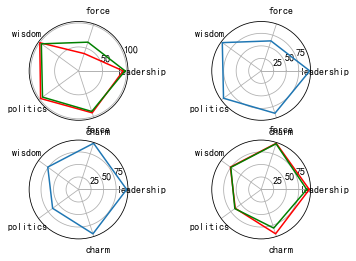

In [73]:
fig = plt.figure()
ax_1 = plt.subplot(221, projection='polar')
ax_2 = plt.subplot(222, projection='polar')
ax_3 = plt.subplot(223, projection='polar')
ax_4 = plt.subplot(224, projection='polar')
labels = ['leadership', 'force', 'wisdom', 'politics', 'charm']
abilities = {'zgl': [93, 38, 100, 98, 92],
             'smy': [97, 63, 96, 93, 89],
             'gy': [96, 97, 76, 64, 93],
             'zy': [91, 96, 75, 65, 81]}
num = len(labels)
thetas = np.linspace(0, np.pi * 2, num, endpoint=False)
thetas = np.append(thetas, thetas[0])
abilities['zgl'].append(abilities['zgl'][0])
abilities['smy'].append(abilities['smy'][0])
abilities['gy'].append(abilities['gy'][0])
abilities['zy'].append(abilities['zy'][0])
print(thetas)
print(labels)
ax_1.set_xticks(thetas)
ax_1.set_xticklabels(labels)
ax_1.plot(thetas, abilities['zgl'], 'r')
ax_1.plot(thetas, abilities['smy'], 'g')
ax_2.set_xticks(thetas)
ax_2.set_xticklabels(labels)
ax_2.plot(thetas, abilities['smy'])
ax_3.set_xticks(thetas)
ax_3.set_xticklabels(labels)
ax_3.plot(thetas, abilities['gy'])
ax_4.set_xticks(thetas)
ax_4.set_xticklabels(labels)
ax_4.plot(thetas, abilities['gy'], 'r')
ax_4.plot(thetas, abilities['zy'], 'g')